### An introduction to `hywiz`

The following notebook provides a simple demonstration of how `hywiz` can be used to interact with and visualise `hycore` sheds.

For simplicity we do this using completely fake hyperspectral images; though hopefully this shows how `hywiz` could be used with any other `hycore.Shed` dataset.

First, lets use `hycore` to create a test Shed instance and some simple visualisations (pole and fence mosaics).

In [1]:
import hycore
import hylite

from hycore import get_sandbox

# construct a fake test shed with a few drillholes and a handfull of HSI data
S = get_sandbox( fill=True, vis=True, mosaic=True ) 

Creating H01
Creating b001
Creating b002
Creating b003
Creating H03
Creating b001
Creating b002
Creating b003
Creating H02
Creating b001
Creating b004


For the visualisation platform, we can create a simple about.md file in this shed containing info on the locality, authorship, number of scans etc.

The function below will create this file -- but feel free to manually edit it to add more information.

In [3]:
S.createAboutMD(author_name='Isaac Newton')

### 1. Interactive HyWiz Server

Now all we need to do is launch a `hywiz` visualisation server!

In [ ]:
from hywiz import launch
launch(shed=S)

The link above ( [http://127.0.0.1:5555](http://127.0.0.1:5555) ) should lead to a `HyWiz` index page that looks something like the one shown below. Please note the link in the top-right to a help page that describes how to use the viewer.

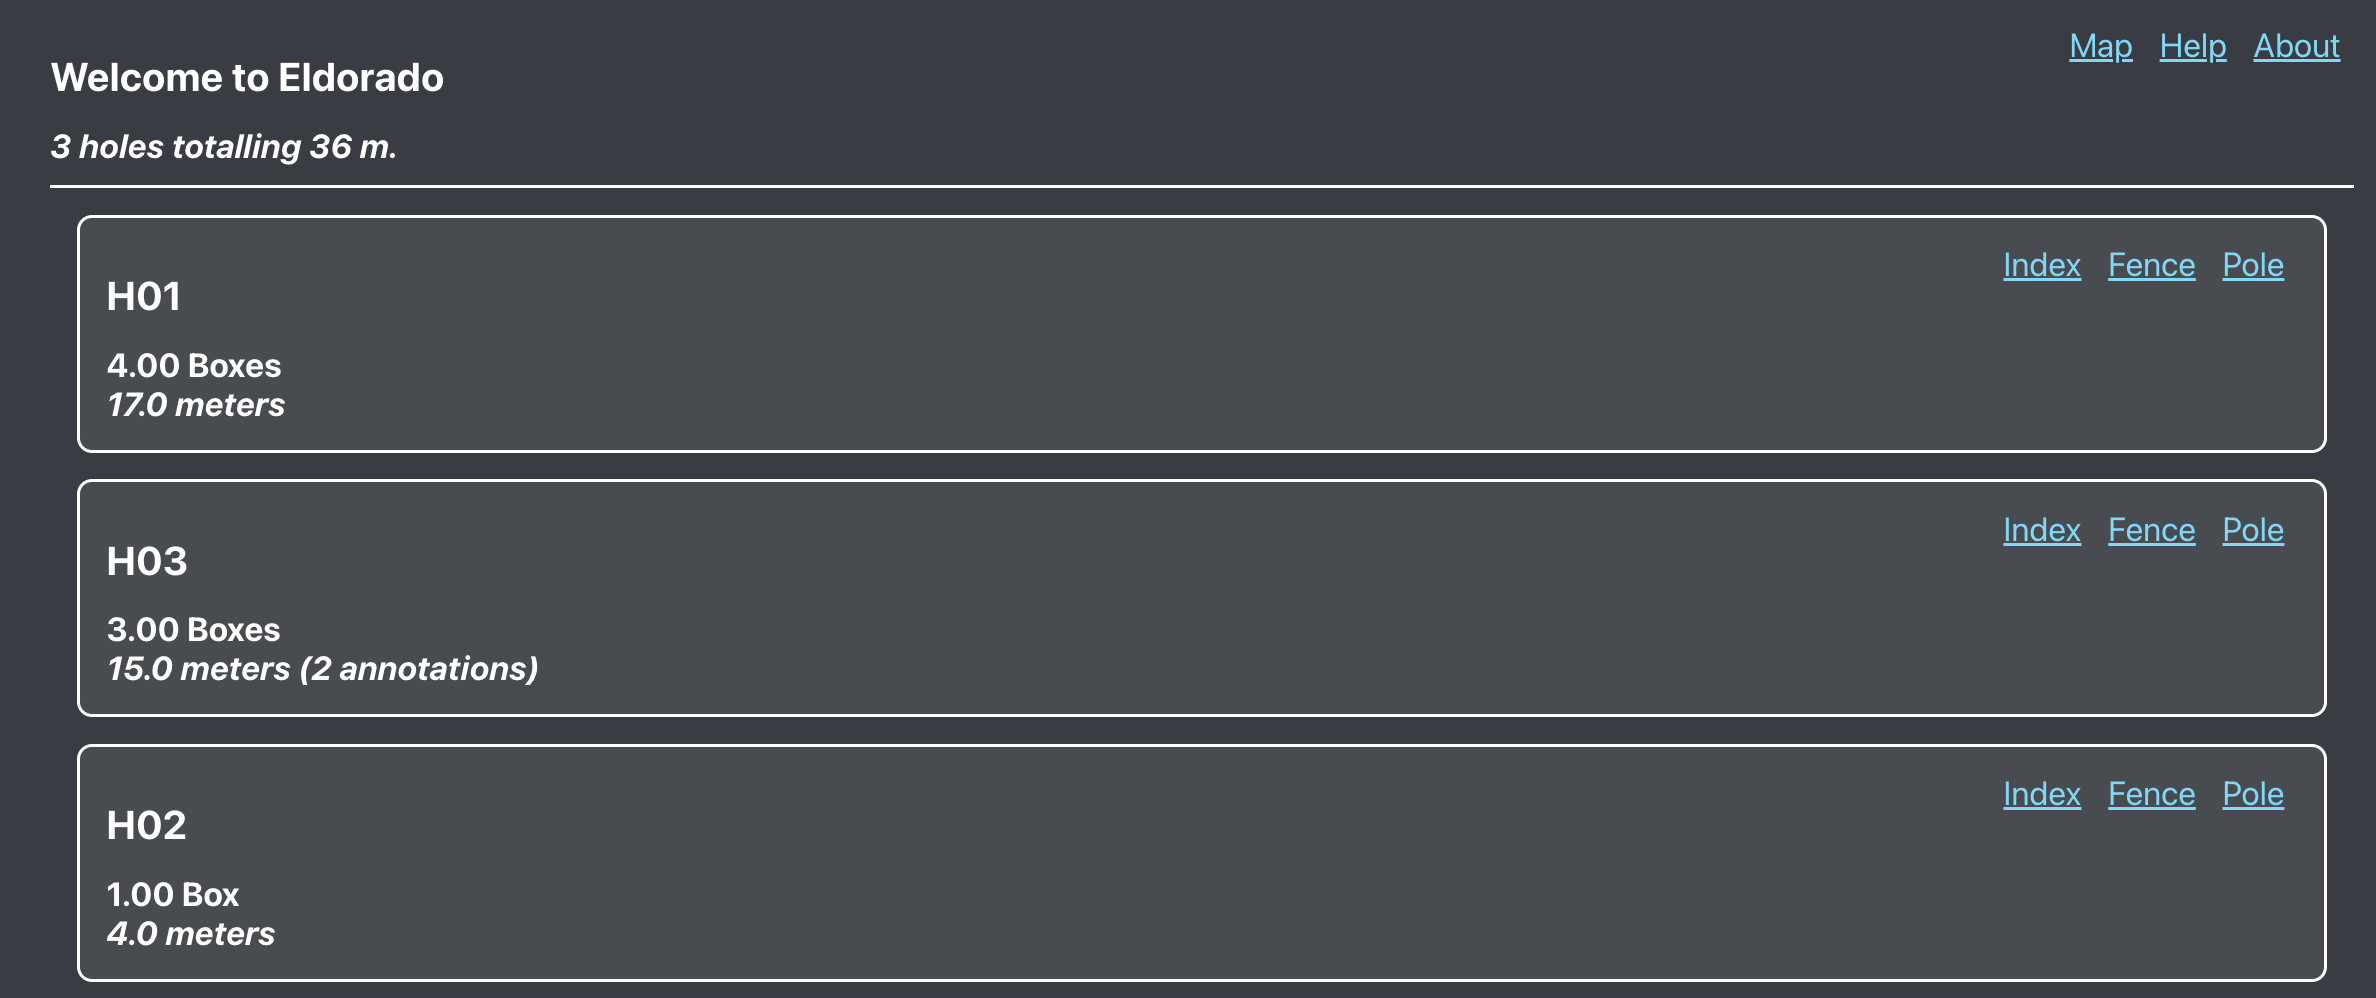

### 2. Static HTML sites

We can also use `hywiz` to export a static HTML version of the viewer, for easy hosting on a more permanent web-server. 

(Note that you may need to interupt the web-server running above before these cells will run)

In [8]:
from hywiz import buildWeb

In [10]:
buildWeb( shed=S, 
          compile=False, # compile everything into an executable zip file [ not needed here ]
          results={'BR_Clays.png' : 'LEG_Clays.png'}, # results to visualise and their associated legend images
          crop=True, # crop imagery to masked areas to reduce file size
          tray_step = 2, # reduce tray size by a factor of 2 to reduce file size
          mosaic_step = 2, # reduce mosaic image size by a factor of 2 to reduce file size
          vb=True )

Copied 64 images to output directory (/Users/thiele67/Documents/Python/Public/hywiz/sandbox/eldorado_html/img).
	 Output sensors are: ['FENIX', 'LWIR']
	 Output results are: 
		 BR_Clays.png (legend: LEG_Clays.png)


'/Users/thiele67/Documents/Python/Public/hywiz/sandbox/eldorado_html/shedIndex.html'

Navigating to the HTML file specified above should then open the static version of the site. Note that due to COORS policy this will not be fully functional unless hosted on a web server (but, most things should work).

Lastly, we can quickly delete all the demo files we just created.

In [ ]:
# cleanup; it isn't easy being clean
import shutil
from pathlib import Path
if os.path.exists( Path(os.getcwd()) / 'sandbox' ):
    shutil.rmtree( Path(os.getcwd()) / 'sandbox' ) # cleanup by deleting the shed we just created